# Problem statement of this case study :- Introduction
Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


# What we need to identify 
• Identify the risky loan applicants, then such loans can be reduced thereby cutting 
down the amount of credit loss


• Driving factors (or driver variables) behind loan default, i.e. the variables which are 
strong indicators of default.


• Identify patterns which indicate if a person is likely to default, which may be used for 
taking actions such as denying the loan, reducing the amount of loan, lending (to 
risky applicants) at a higher interest rate, etc


• How consumer attributes and loan attributes influence the tendency of default.


• The below three factors company need to know :-

• Loan accepted: If the company approves the loan, there are 3 possible 
scenarios described below:

• Fully paid: Applicant has fully paid the loan (the principal and the interest rate)


• Current: Applicant is in the process of paying the instalments, i.e. the tenure of 
the loan is not yet completed. These candidates are not labelled as 'defaulted'.


• Charged-off: Applicant has not paid the instalments in due time for a long 
period of time, i.e. he/she has defaulted on the loan

What we are 
going to achieve 
• About how real business 
problems are solved using EDA.
• Also develop a basic 
understanding of risk analytics in 
banking and financial services 
and understand how data is used 
to minimize the risk of losing 
money while lending to 
customers.


# Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
Present the overall approach of the analysis in a presentation: 
Mention the problem statement and the analysis approach briefly 
Explain the results of univariate, bivariate analysis etc. in business terms
Include visualisations and summarise the most important results in the presentation
 

You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. 

 

In [15]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Reading the data from csv file to dataframe
loan_data = pd.read_csv("loan.csv", low_memory=False)
#Check for unnecessary header and footer rows to delete
loan_data.head()
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(loan_data.shape)
#Remove missing value columns if any
loan_data.dropna(axis = 1, how = 'all', inplace = True)
print(loan_data.shape)

(39717, 111)
(39717, 57)


<AxesSubplot:>

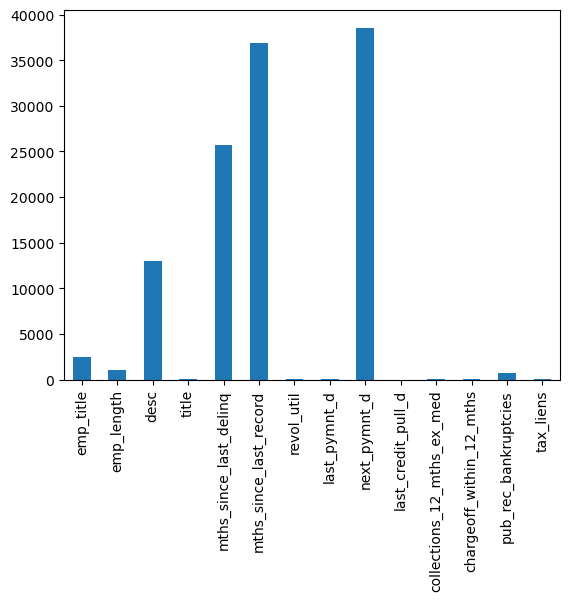

In [17]:
#plot to understand missing values in each column of the dataset
loan_data.isna().sum()[loan_data.isna().sum()>0].plot(kind='bar')

In [18]:
#From above plot we can see that some cloumns have missing values, drop columns where null values are more than 10000
loan_data.drop(loan_data.columns[loan_data.apply(lambda col: col.isna().sum() > 10000)], axis=1, inplace=True)
print(loan_data.shape)
#Remove missing value rows from columns having null vlaues < 10000
loan_data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)
loan_data.dropna(subset=['emp_title'], inplace=True)
loan_data.dropna(subset=['emp_length'], inplace=True)
print(loan_data.shape)

(39717, 53)
(36548, 53)


In [19]:
#Drop columns with only one value for all rows . We can't do any analysis on these columns.
loan_data.drop(loan_data.columns[loan_data.apply(lambda col: col.nunique() == 1)], axis=1, inplace=True)
print(loan_data.shape)

(36548, 44)


In [20]:
#Let us understand the loan_data
print(loan_data.dtypes)

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [21]:
loan_data.shape

(36548, 44)

# Now we have 44 columns out of which some correspond to the post approval of loan
We will see the user details and the driving factors of loan defaulting before approving loan.
So we can safely omit the columns / variables respect to that case.
Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
The above features or columns doesnt  to the lparticipayte in the loan defaulting in any way due to unnecessary irrelevant information. So omiting them is best option.
"desc" has description (text data) which we cannot do anythhing about for now. So omitting the column is the best option for me.
"out_prncp_inv" , "total_pymnt_inv " are useful for investors but not required to the loan defaulting analysis. So omitting them is the best option for me.
"funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , "out_prncp_inv" , "total_pymnt_inv " are useful for investors but not required to the loan defaulting analysis. So omitting them is the best option for me.


List of post-approval features:- 
delinq_2yrs
revol_bal
out_prncp
total_pymnt
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
chargeoff_within_12_mths
mths_since_last_delinq
mths_since_last_record

In [22]:
#lETS HAVE A LOOK ON TOTAL COLUMNS LEFT FOR US 
loan_data.columns


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [52]:
loan_data.shape


(35482, 28)

In [50]:
#We need to understand the features that which kind of people default , we will remove the one where status is current later on .. will see
#The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [ ]:
# working on missing values is important to get good results

In [51]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.025365
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129643
total_acc               0.000000
pub_rec_bankruptcies    0.000000
dtype: float64

In [75]:
# Missing values

<AxesSubplot:>

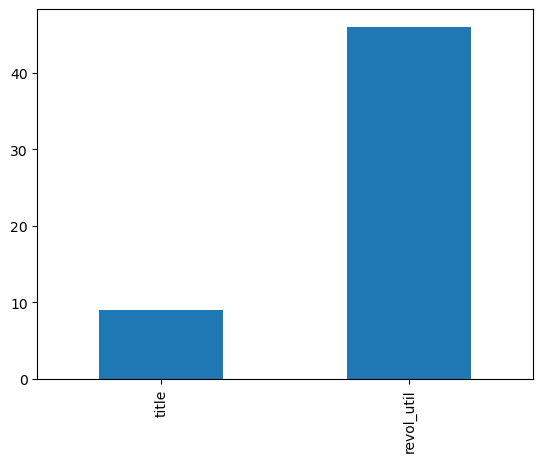

In [53]:
loan_data.isna().sum()[loan_data.isna().sum()>0].plot(kind='bar')

In [61]:
#Managing Missing values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35436 entries, 1 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35436 non-null  int64  
 1   funded_amnt           35436 non-null  int64  
 2   funded_amnt_inv       35436 non-null  float64
 3   term                  35436 non-null  object 
 4   int_rate              35436 non-null  object 
 5   installment           35436 non-null  float64
 6   grade                 35436 non-null  object 
 7   sub_grade             35436 non-null  object 
 8   emp_title             35436 non-null  object 
 9   emp_length            35436 non-null  object 
 10  home_ownership        35436 non-null  object 
 11  annual_inc            35436 non-null  float64
 12  verification_status   35436 non-null  object 
 13  issue_d               35436 non-null  object 
 14  loan_status           35436 non-null  object 
 15  purpose            

In [63]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8037
2 years      4089
< 1 year     3986
3 years      3840
4 years      3214
5 years      3054
1 year       2969
6 years      2064
7 years      1639
8 years      1364
9 years      1180
Name: emp_length, dtype: int64

In [79]:
#The aforementioned value calculate and showcase that the mode value has far higher frequency than that of the next most frequent value.

-This depicts that we can safely assign the value of mode to the null values in the column.
-Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [64]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [57]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

Standardizing the data
-"revol_util" column although described as an object column, it has continous values.
-So we need to standardize the data in this column
-"int_rate" is one such column.
-"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
-Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [65]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [66]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [67]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [68]:

loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,...,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,...,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8,...,23.51,0,Jul-05,1,7,0,17726,85.6,11,0.0
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,9,...,5.35,0,Jan-07,2,4,0,8221,87.5,4,0.0


In [89]:
#Remove Outliers 

<AxesSubplot:xlabel='annual_inc'>

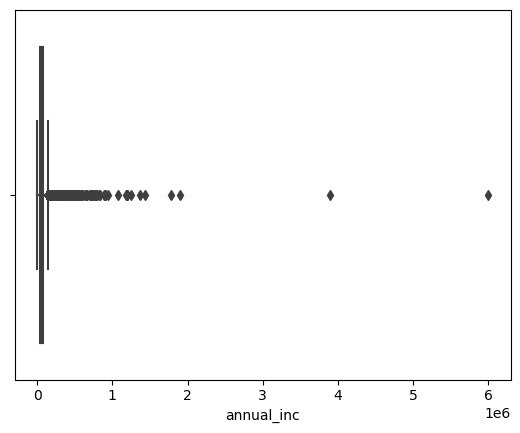

In [69]:
# plot with specifying the x, y parameterss
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.boxplot(loan_data['annual_inc'])

In [70]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     60000.0
0.75     82400.0
0.90    115000.0
0.95    140000.0
0.97    162000.0
0.98    182496.0
0.99    230000.0
Name: annual_inc, dtype: float64

In [71]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

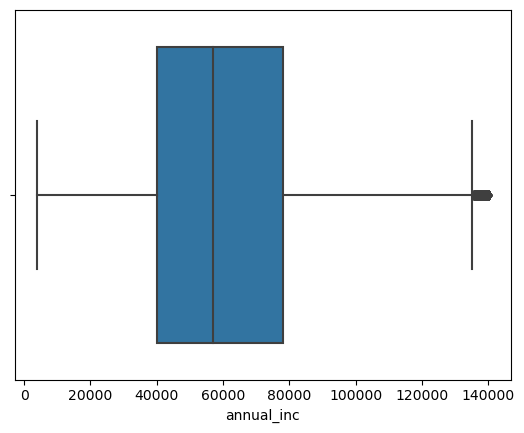

In [72]:
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.boxplot(loan_data.annual_inc)

#Now the "annual_inc" data looks good and proceeding next.analyze other numerical variables which may have outliers.
-dti
-loan_amnt
-funded_amnt_inv

<AxesSubplot:xlabel='dti'>

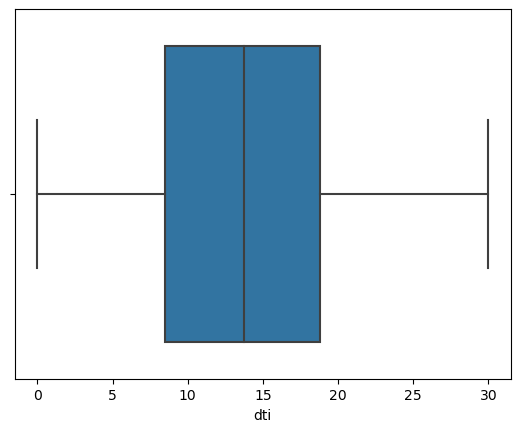

In [73]:
# plot with specifying the x, y parameters
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.boxplot(loan_data.dti)

<AxesSubplot:xlabel='loan_amnt'>

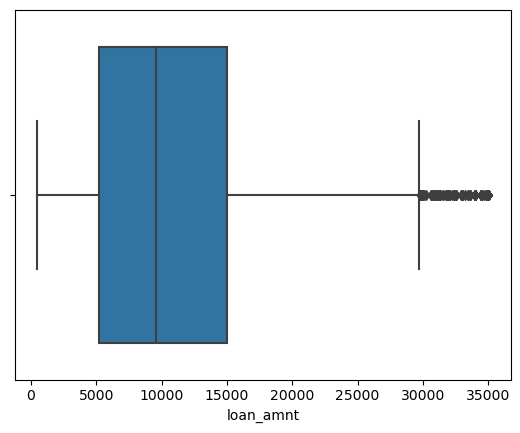

In [74]:
sns.boxplot(loan_data.loan_amnt)

In [75]:

loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25975.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

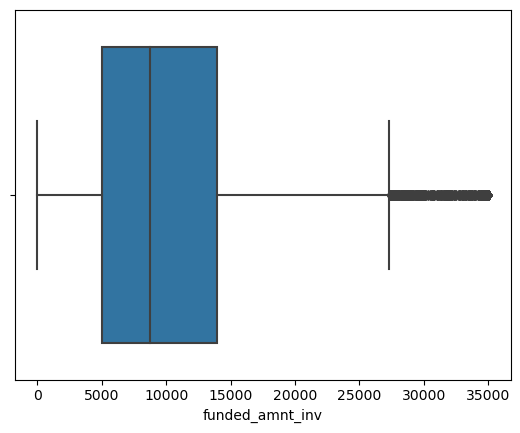

In [76]:

sns.boxplot(loan_data.funded_amnt_inv)

In [77]:

loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8775.000000
0.750    13925.000000
0.900    19825.000000
0.950    23975.000000
0.970    24975.000000
0.975    25745.125902
0.980    27975.000000
0.985    29950.000000
0.990    31994.500000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

# Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

# As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable

In [124]:
#We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<AxesSubplot:xlabel='loan_status', ylabel='count'>

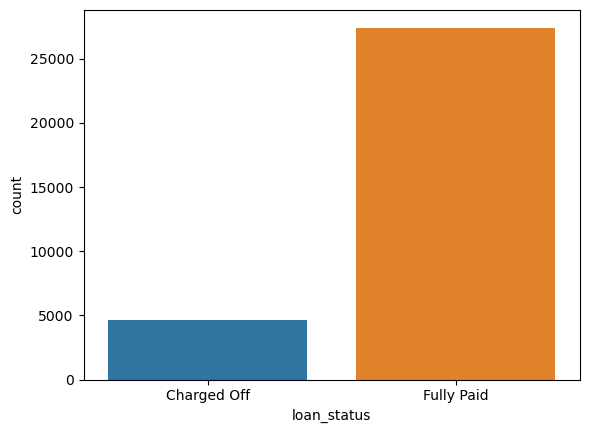

In [125]:
sns.countplot(x = 'loan_status', data = loan_data)

In [78]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

1    4
3    1
5    4
6    5
7    1
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

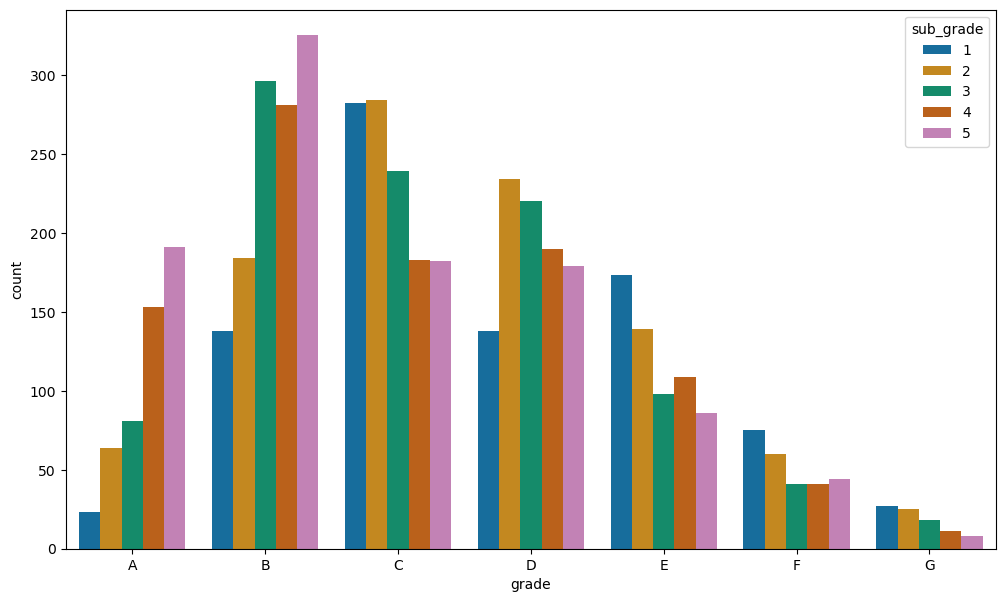

In [79]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

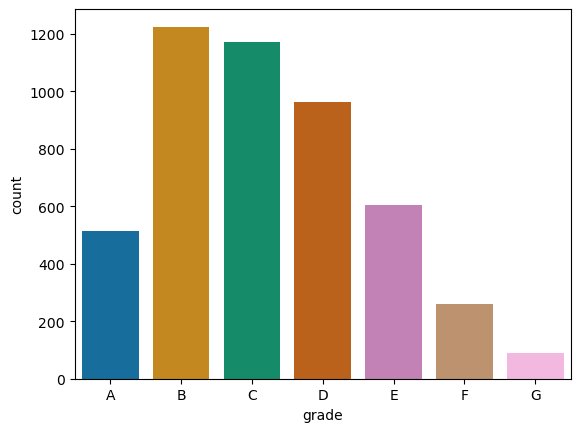

In [80]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


In [129]:
#We will see who has house or rent 

In [106]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [131]:
#There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [83]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [84]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

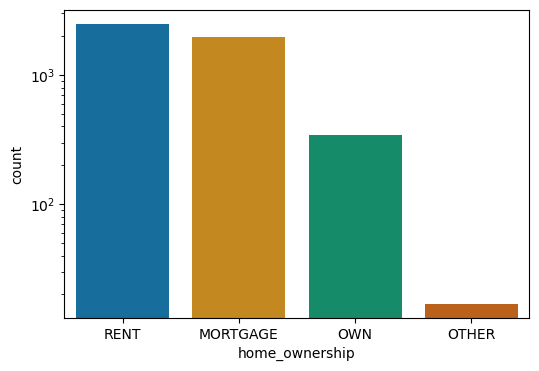

In [85]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [135]:
#Analyzing reason why they took loan whether they want to buy something or not (Rationale or purpose)

<AxesSubplot:xlabel='count', ylabel='purpose'>

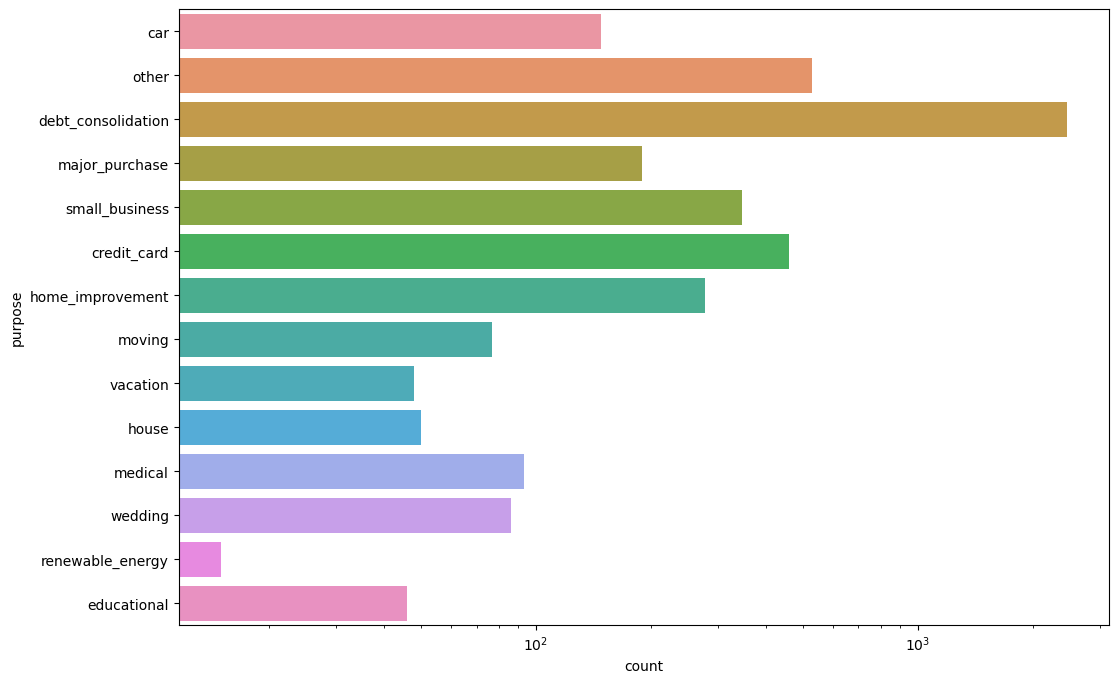

In [86]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [137]:
#I am making or establishing the bins for some numerical variable to make them categorical

In [87]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [88]:
# Viewing new bins created
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,Ryder,0,...,0,1687,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,AIR RESOURCES BOARD,10,...,0,5598,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,Veolia Transportaton,3,...,0,7963,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k
6,7000,7000,7000.0,60 months,15.96,170.08,C,5,Southern Star Photography,8,...,0,17726,85.6,11,0.0,13%-17%,2-10,80-100,2-20,31k-58k
7,3000,3000,3000.0,36 months,18.64,109.43,E,1,MKC Accounting,9,...,0,8221,87.5,4,0.0,17%-21%,2-10,80-100,2-20,31k-58k


In [141]:
#Analyzing interest rate wrt the interest rate bins created

<AxesSubplot:xlabel='emp_length', ylabel='count'>

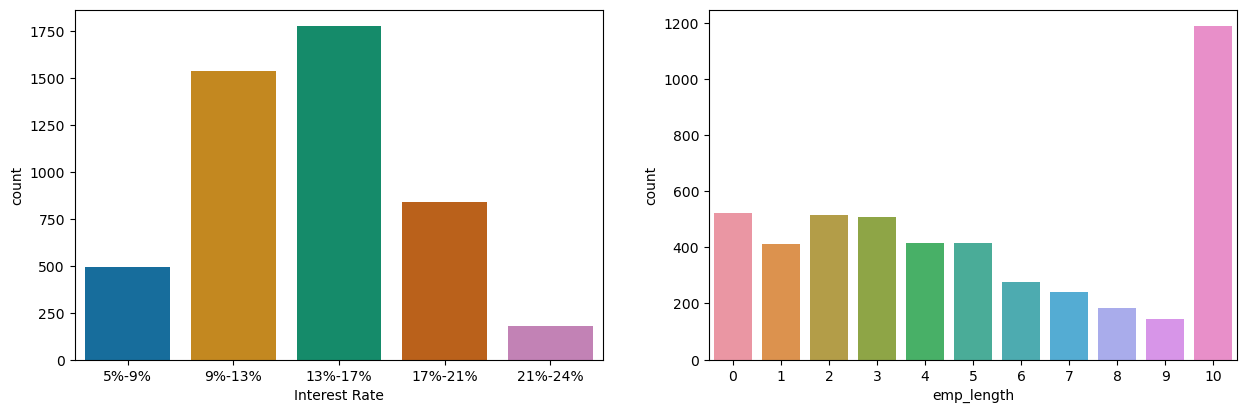

In [89]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

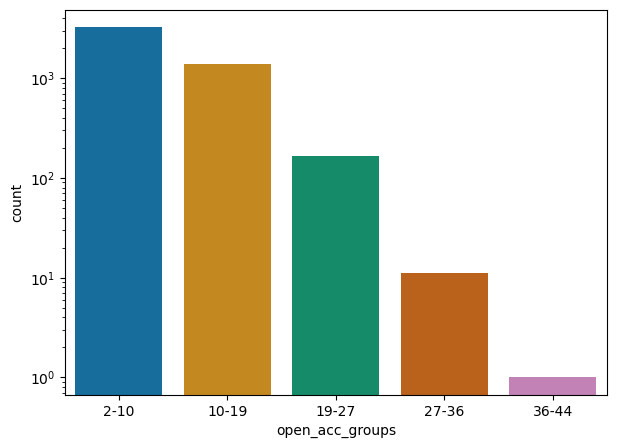

In [90]:
#Similarly analyzing open_acc,revol_util,total_acc,annual_inc
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

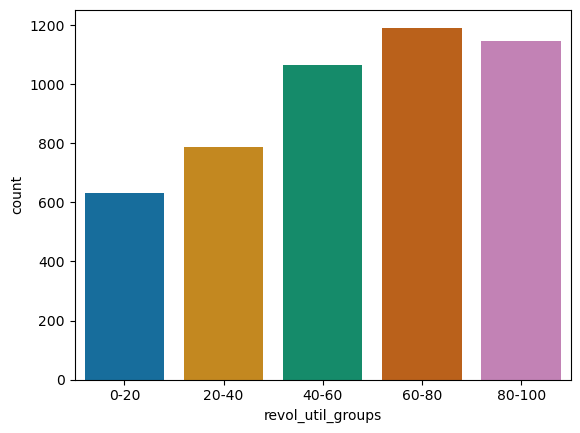

In [91]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

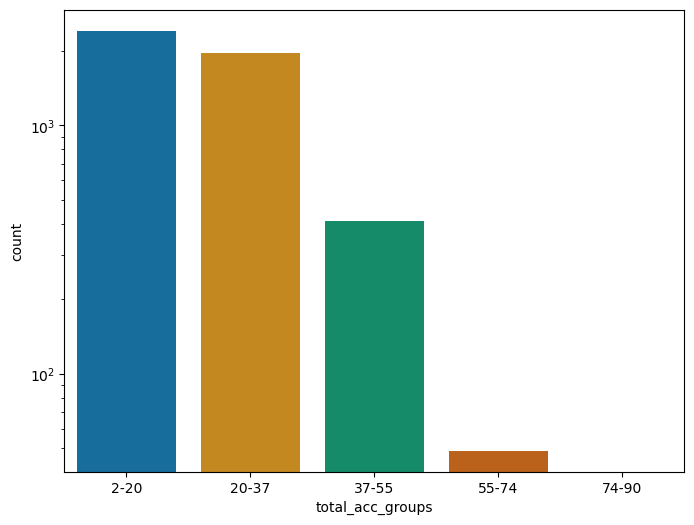

In [92]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

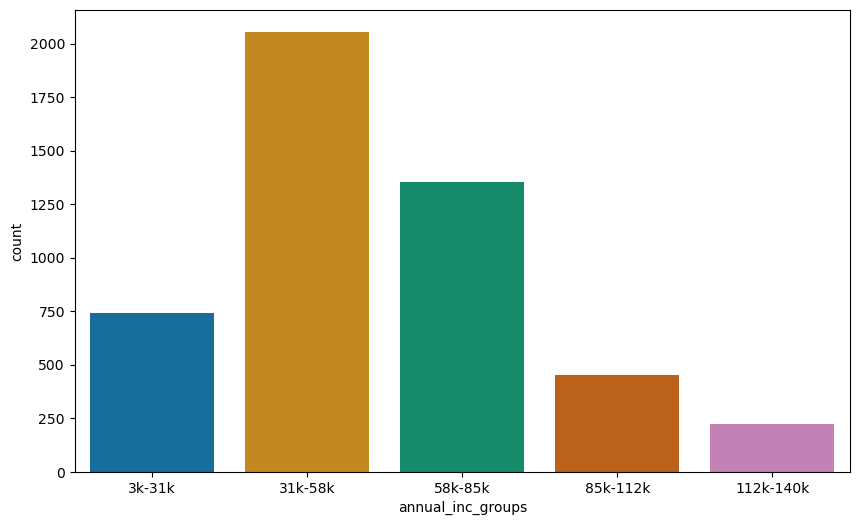

In [93]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

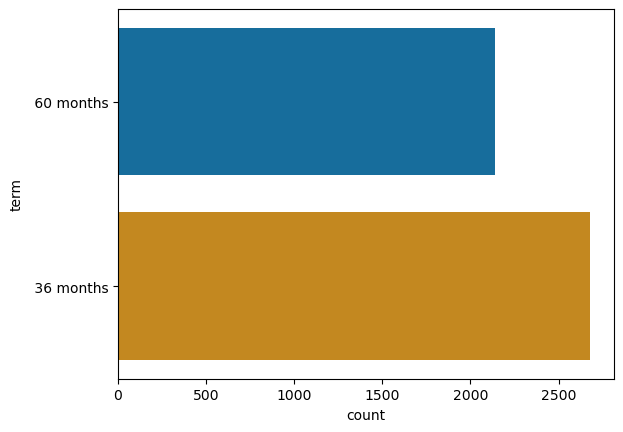

In [94]:

sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

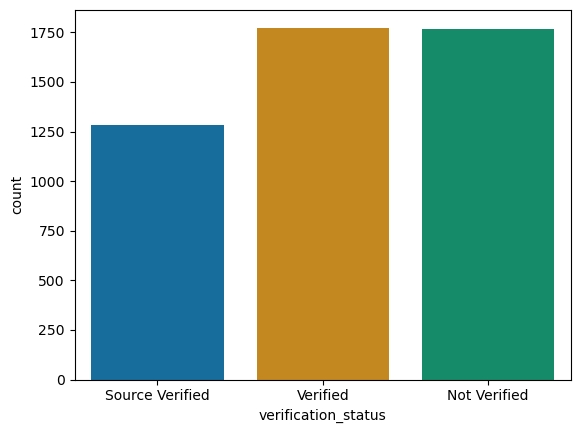

In [95]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

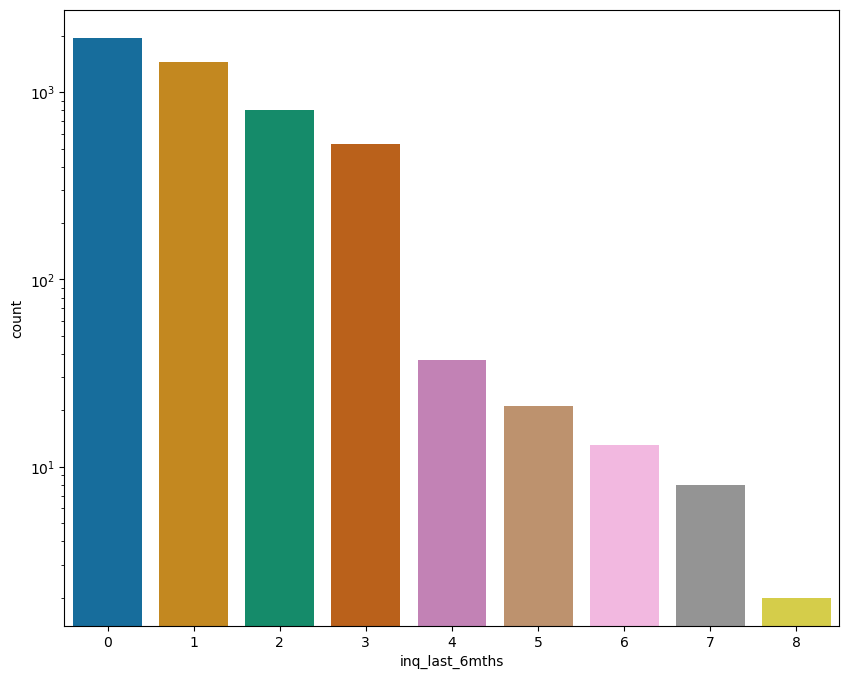

In [96]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

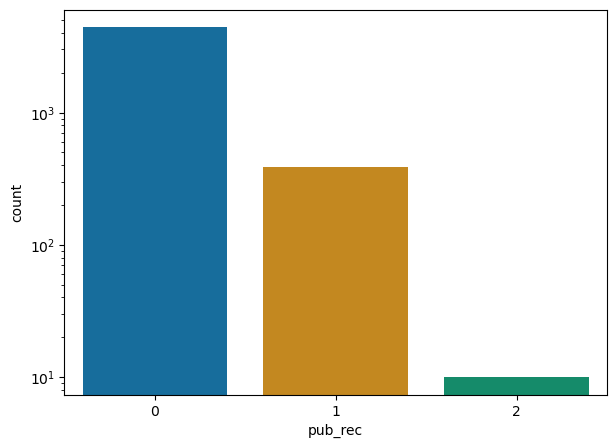

In [97]:

fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [151]:
#We will now determine by checking or analyzing issued month & Year 

In [98]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [99]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,revol_util,total_acc,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,Ryder,0,...,9.4,4,0.0,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,AIR RESOURCES BOARD,10,...,21.0,37,0.0,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,4,Veolia Transportaton,3,...,28.3,12,0.0,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011
6,7000,7000,7000.0,60 months,15.96,170.08,C,5,Southern Star Photography,8,...,85.6,11,0.0,13%-17%,2-10,80-100,2-20,31k-58k,Dec,2011
7,3000,3000,3000.0,36 months,18.64,109.43,E,1,MKC Accounting,9,...,87.5,4,0.0,17%-21%,2-10,80-100,2-20,31k-58k,Dec,2011


<AxesSubplot:xlabel='issue_year', ylabel='count'>

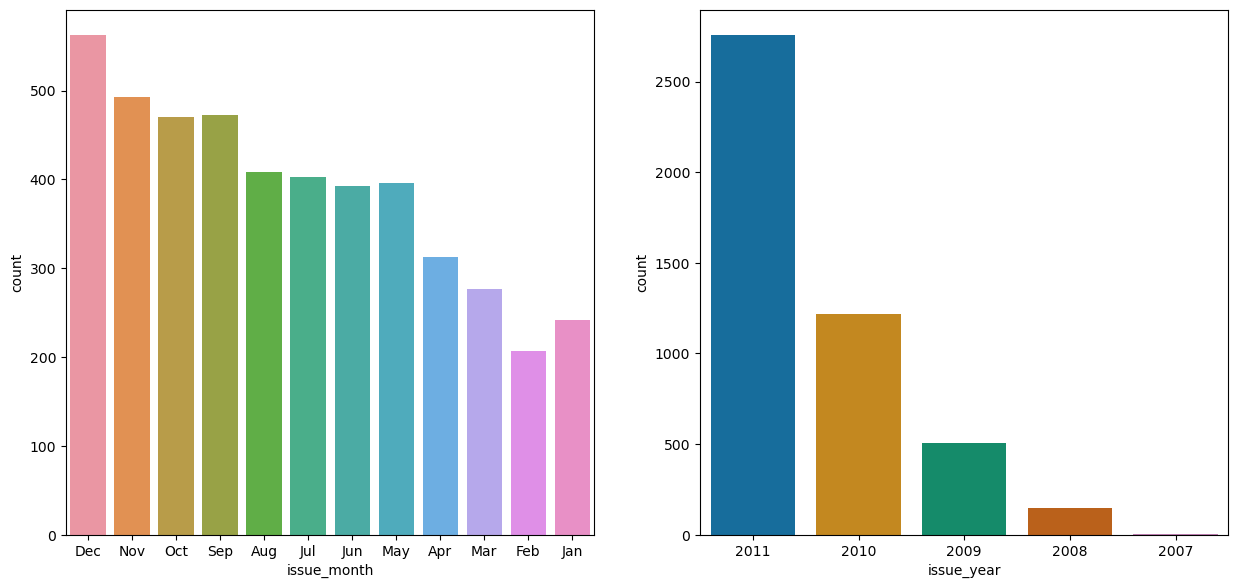

In [154]:
plt.figure(figsize=(15,15))
plt.subplot(221)
Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years
Analyzing installment,dti, loan_amnt

# Maximum number of defaults you can see when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

Analyzing installment,dti, loan_amnt
In this way you can check when was the time when the people got the loan in which year. 

In [100]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

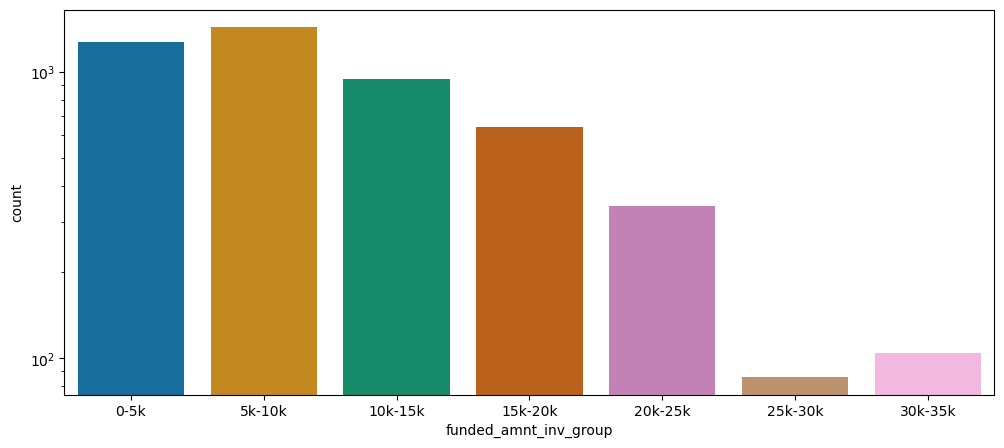

In [101]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

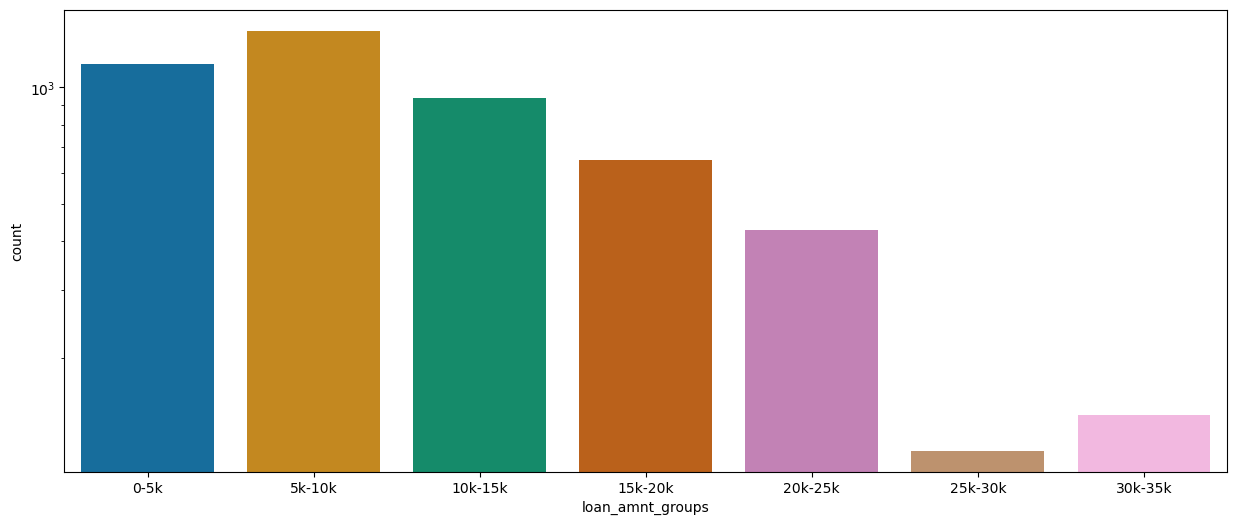

In [102]:

fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

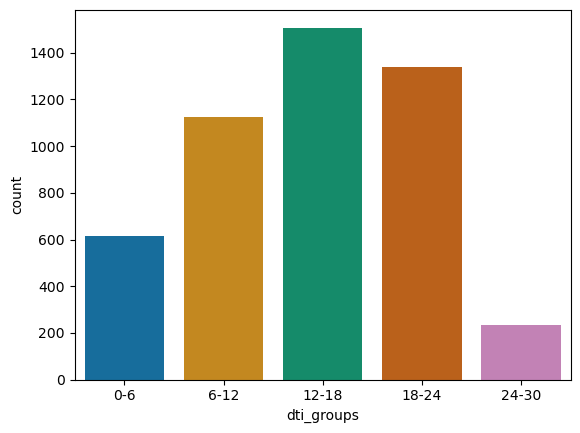

In [103]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

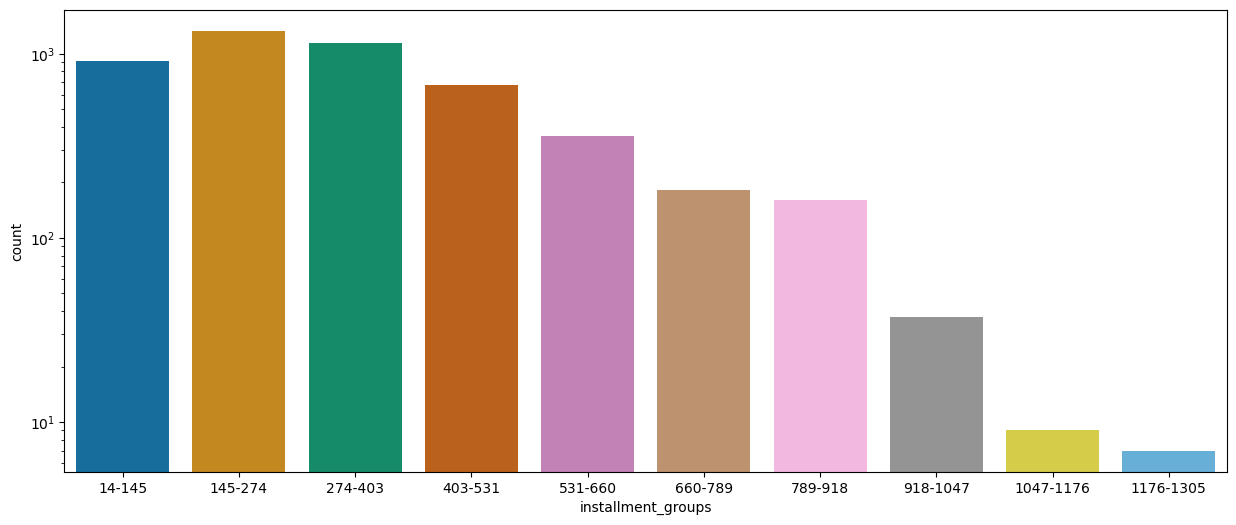

In [104]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

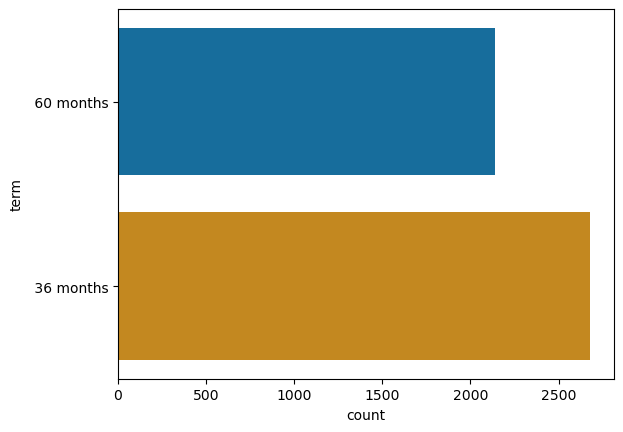

In [105]:

sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [162]:
#Findings 

In [164]:
#we can consider the important factor to consider is The late months of an year indicated the high possibility of defaulting.

In [165]:
# rationale behind the humangous or high number of loan defaults in 2011 could be due to the financial crisis  (Assuming the data )

# Analysing annual income with other columns for more insights


# 1. Annual income vs loan rationale or purpose

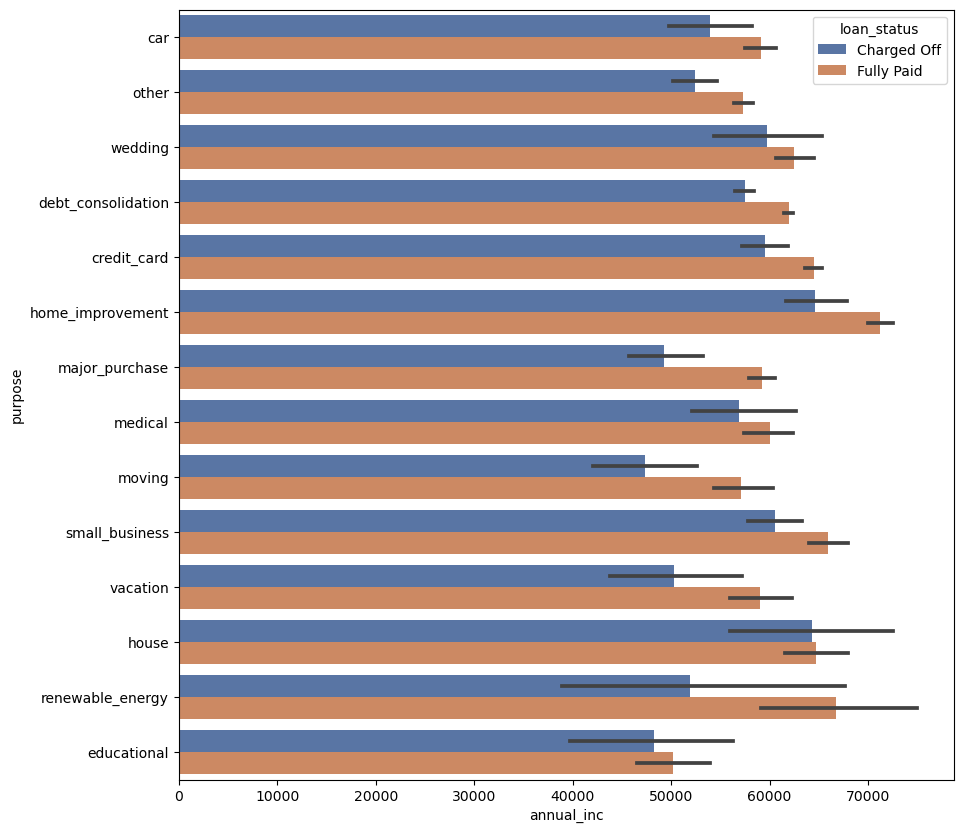

In [107]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

# we know the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest

# ##Applicants with higher salary mostly applied loans for "home_improvement", "house", "renewable_energy" and "small_businesses"

# 2.Annual income vs home ownership

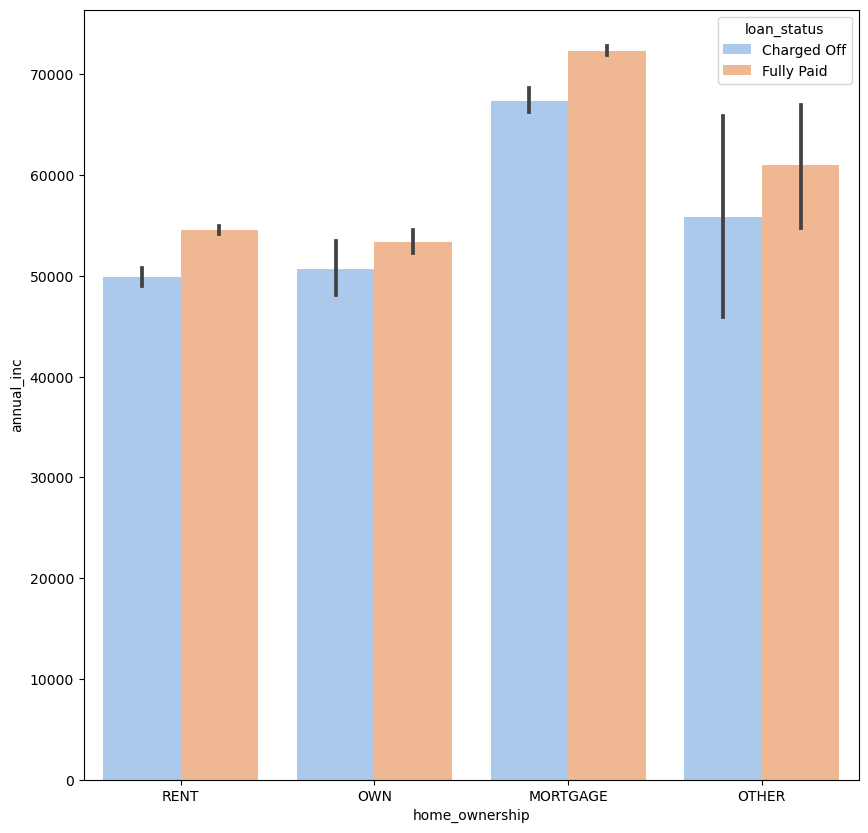

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan_data, x='home_ownership' , y='annual_inc', hue ='loan_status', palette = "pastel")
plt.show()

# 3.Across all the income groups, the loan_amount is higher for people who defaulted.

# 4. Loan amount vs month issued and year issued

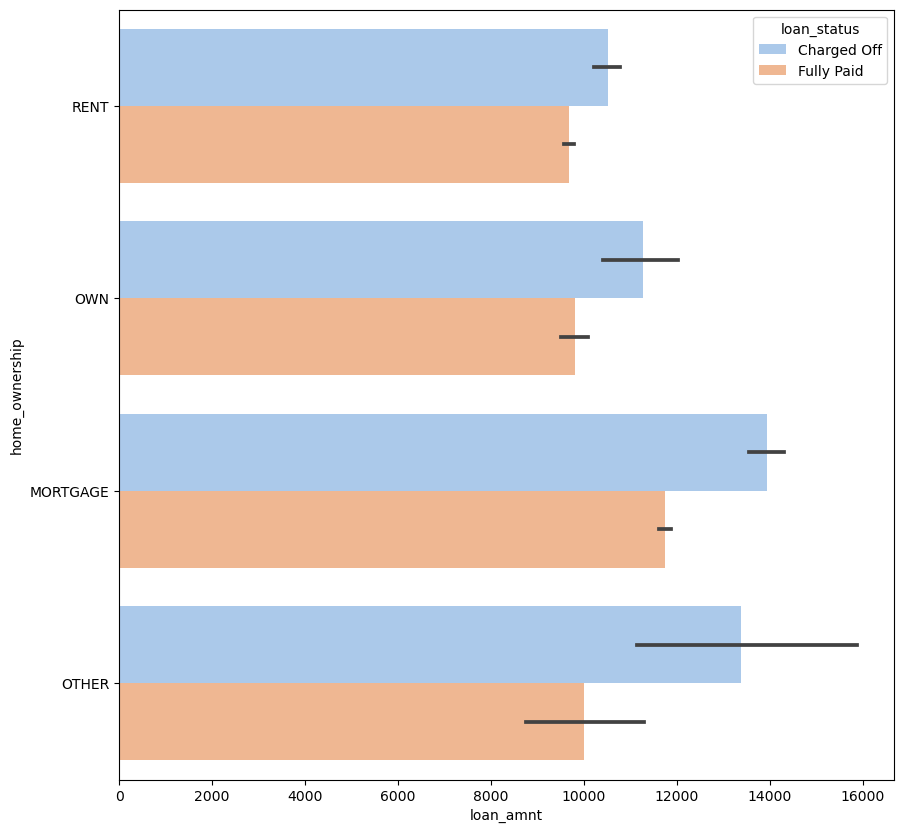

In [110]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

# 5.Loan amount vs Grade

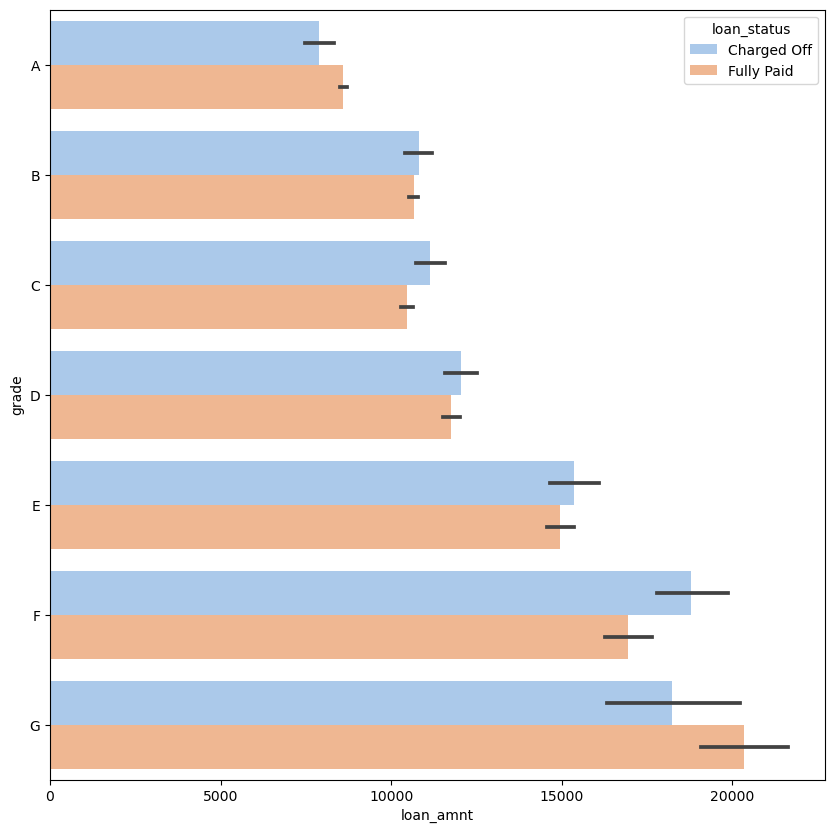

In [111]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

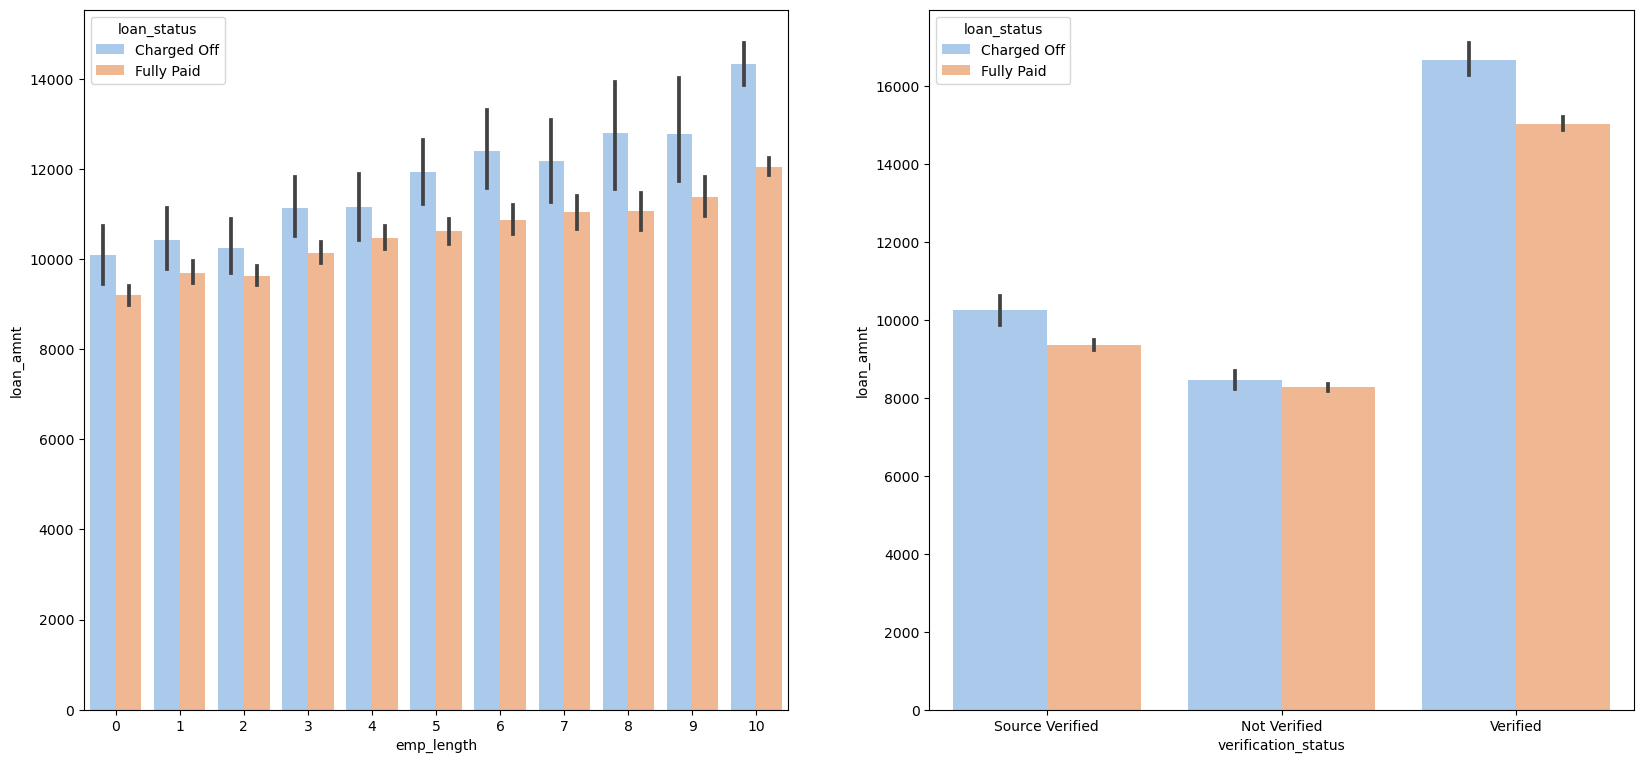

In [112]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

<AxesSubplot:xlabel='issue_year', ylabel='loan_amnt'>

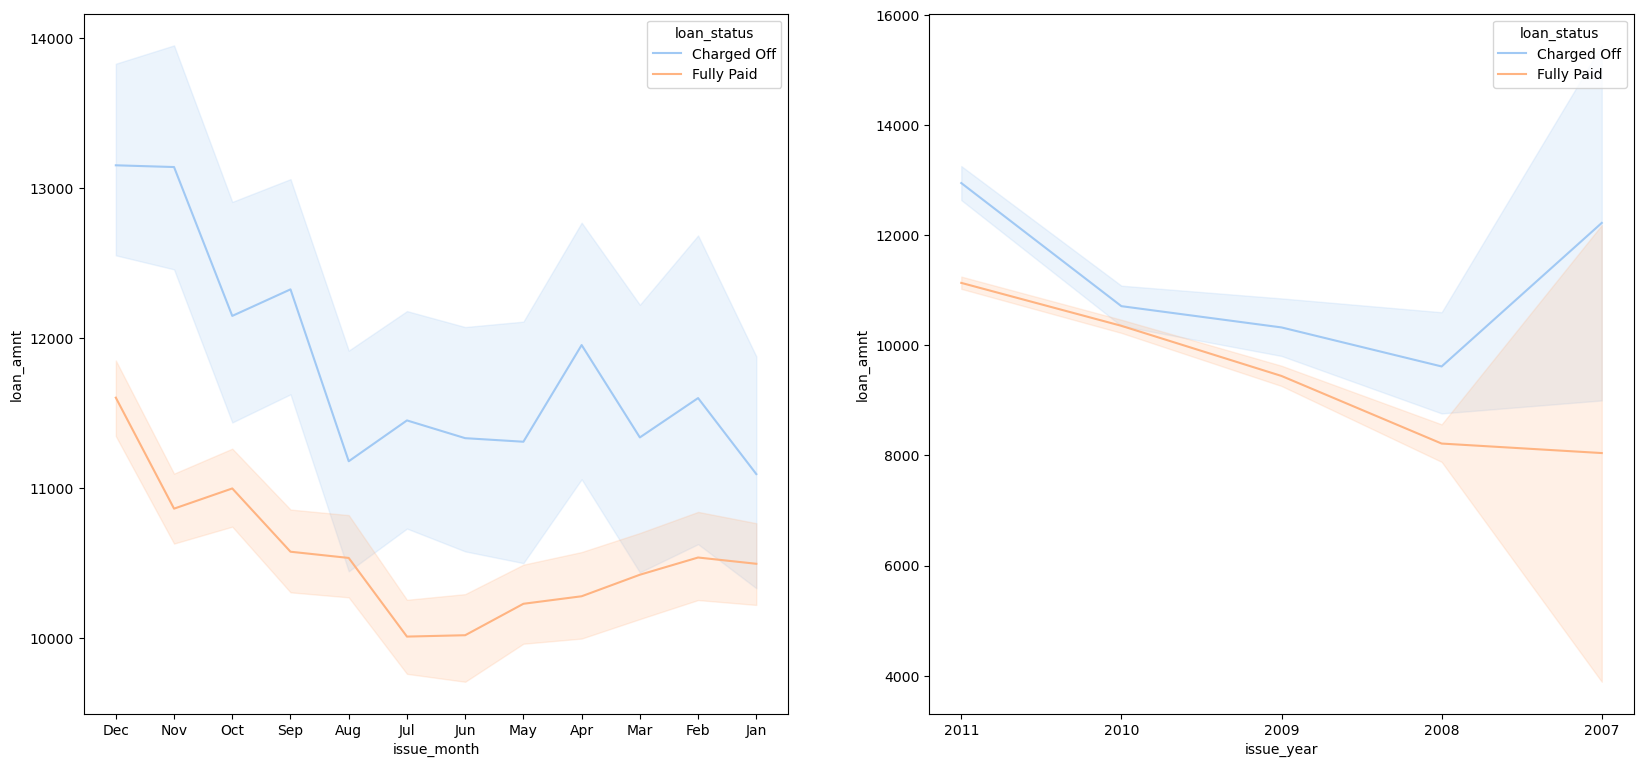

In [113]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

# Loan amount wrt Grade 

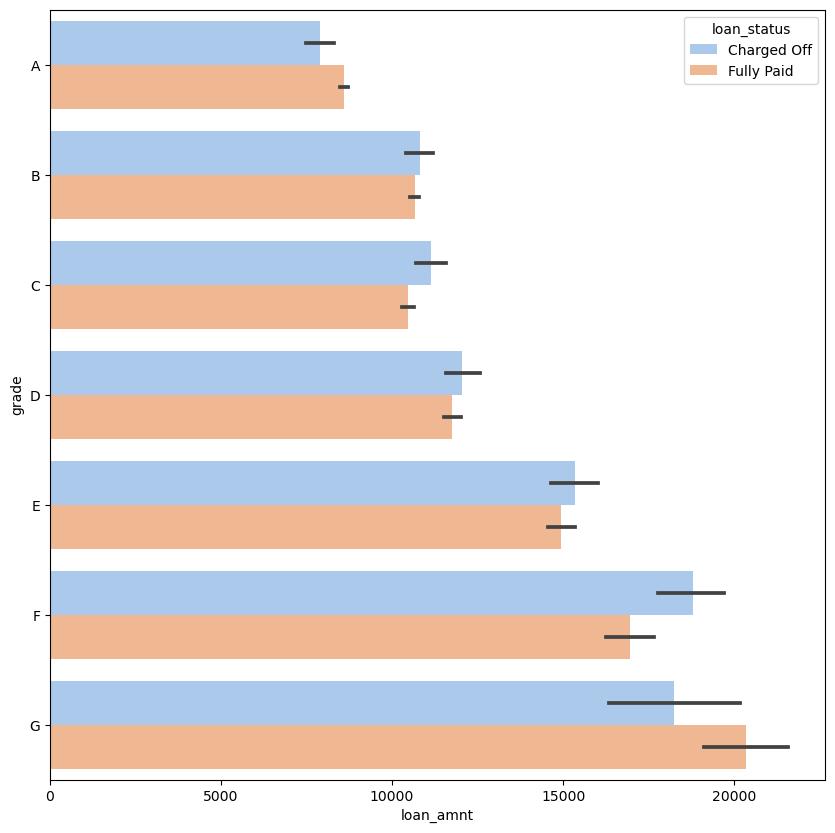

In [114]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

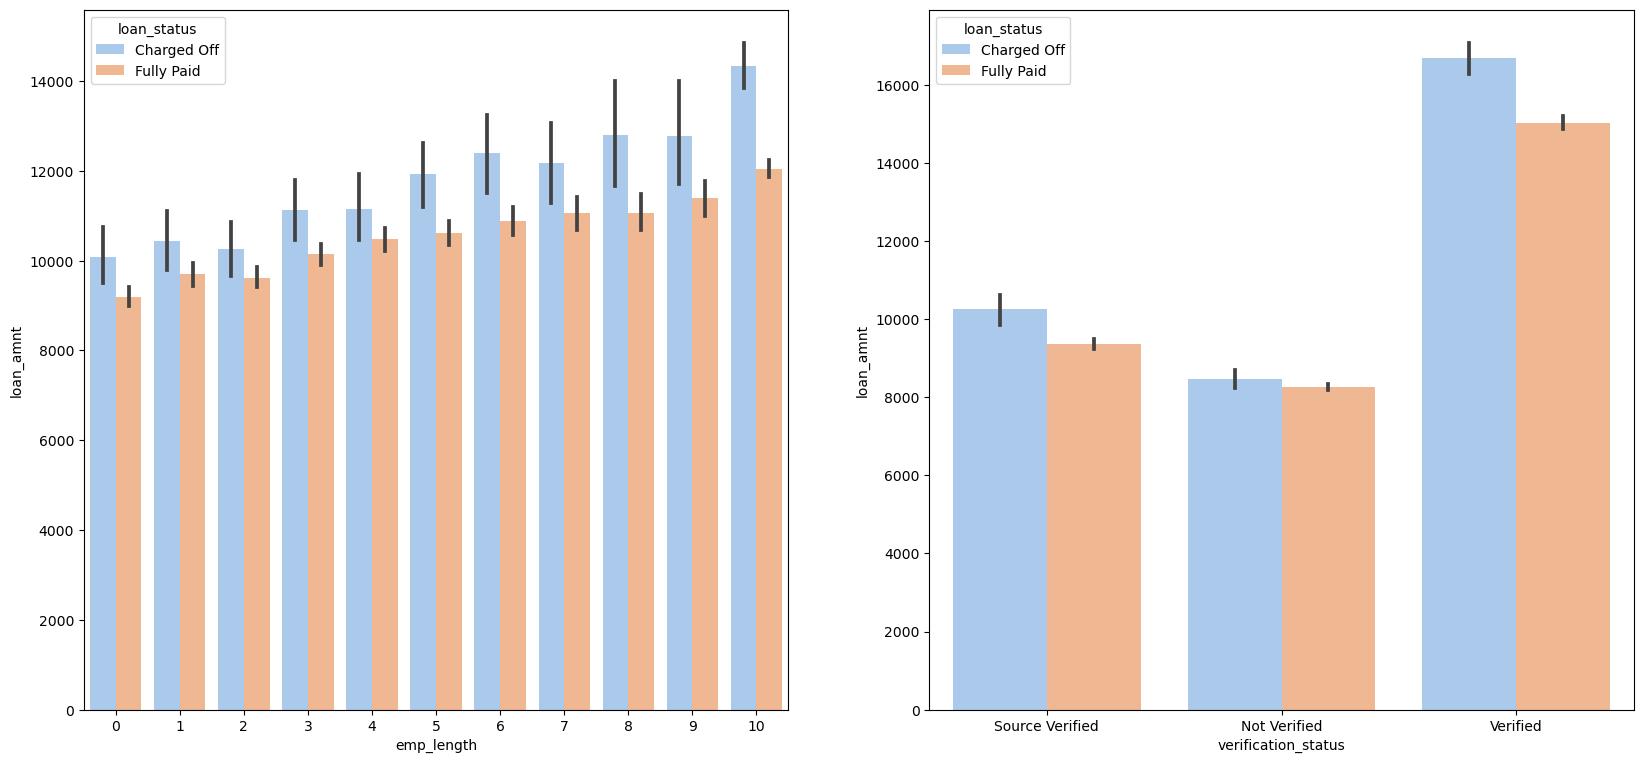

In [115]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

# Grade VS interest 

Employees with longer working history got the loan approved for a higher amount.
Looking at the verification status data, verified loan applications seems to have higher loan amount. Which might showcase that the firms are first verifying the loans with higher values.

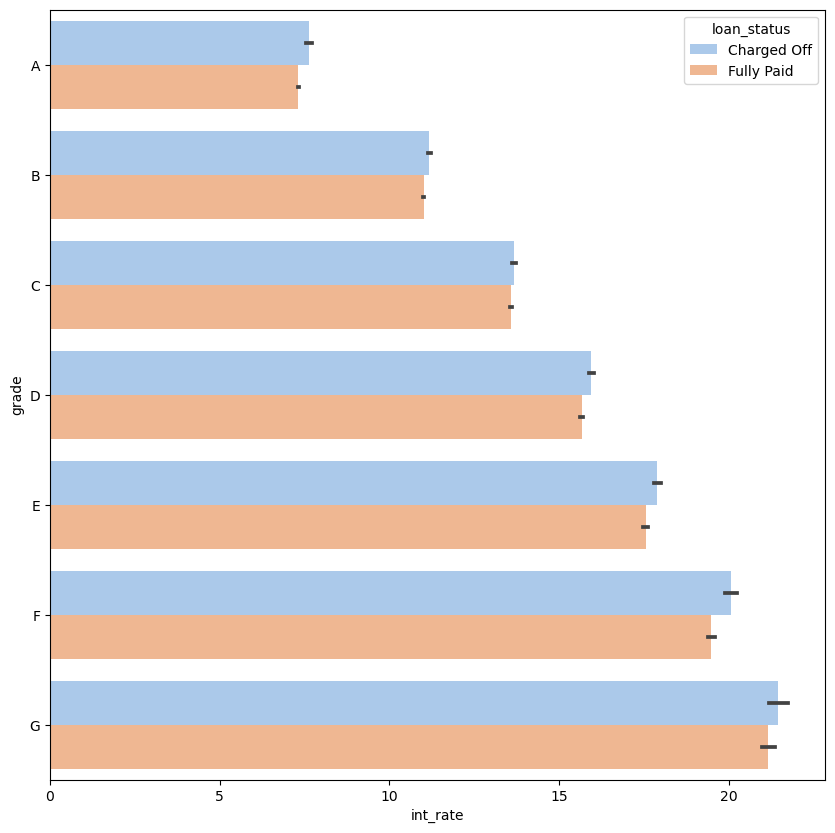

In [116]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

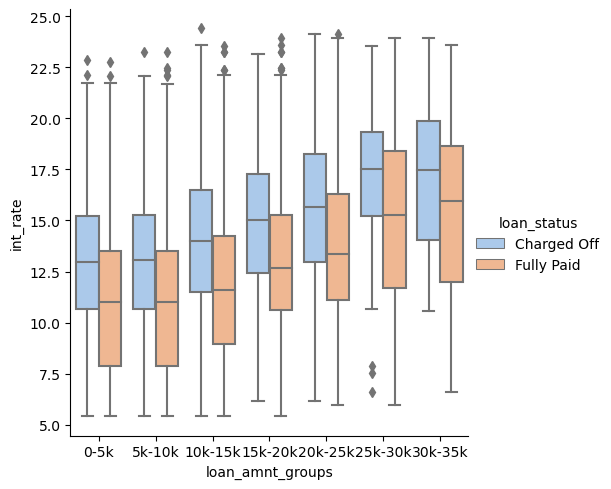

In [117]:
#loan amount group vs interest rate 
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

# above in the chart you can see the interest rate of charged off loan is Higher than fully paid category

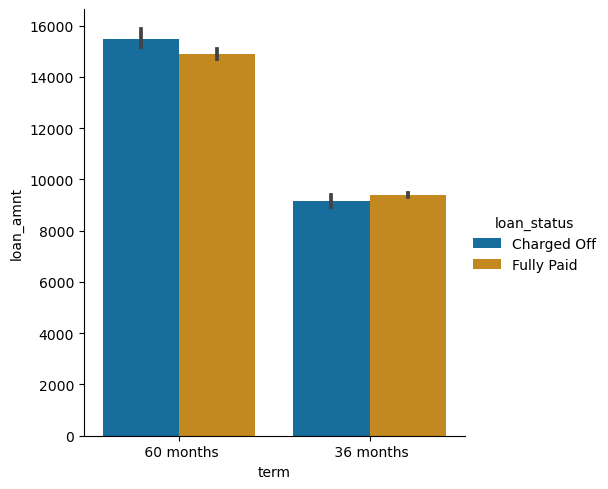

In [118]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_data,hue = 'loan_status', kind = 'bar')

# aforementioned chart depicts that that applicants/subscriber who applied and defaulted have no significant difference in loan_amounts.
shows that subscribers or applicants applying for long term has applied for more loan.

Findings :- 
The aforementioned analysis with respect to the charged off loans. There is a more probability of defaulting when applicants:
taking loan for 'home improvement' and have income of 60000 -70000

whose home ownership is 'MORTGAGE and have income of 60-70k

who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
Observations


The above analysis with respect to the charged off loans. There is a more probability of defaulting when :

People taking loan for 'home improvement' and have income of 60k -70k

People who receive interest at the rate of 21-24% and have an income of 70k-80k


People who have taken a loan for small business and the loan amount is greater than 14k


People who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %


People whose home ownership is 'MORTGAGE and have income of 60-70k


People whose home ownership is 'MORTGAGE and have loan of 14-16k


people in grade  F and loan amount is between 15k-20k is high 


people with loan is verified and loan amount is above 16k is again noticiable


When employment length is 10yrs and loan amount is 12k-14k

For grade G and interest rate above 20%

who have taken a loan for small business and the loan amount is greater than 14k


whereby home ownership is 'MORTGAGE and have loan of 14-16k


Whereby grade is F and loan amount is between 15k-20k


whereby the loan is verified and loan amount is above 16k


Whereby employment length is 10yrs and loan amount is 12k-14k


For grade G and interest rate above 20%s

